# Hello


In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.graph_objs as go
import plotly.subplots as sp
import numpy as np
import os
from typing import List, Tuple

## Average time comparision n = {5, 10, 15, ... 1500}

In [4]:
def create_plot_for_average_time_comparision(file_name):
    if not os.path.isfile(file_name):
        print(f"File '{file_name}' does not exist.")
        return

    plot_data = {}

    with open(file_name, 'r') as file:
        current_algorithm = None
        for line in file:
            line = line.strip()
            if "Algorithm" in line:
                current_algorithm = line
                plot_data[current_algorithm] = []
            else:
                data = [float(value) for value in line.split()]
                if len(data) == 2:
                    plot_data[current_algorithm].append(data)

    plt.figure(figsize=(15, 10))
    for name, data in plot_data.items():
        data = np.array(data)
        plt.plot(data[:, 0], data[:, 1], label=name)

    plt.xlabel("Liczba zawodników w turnieju", fontsize=16)
    plt.ylabel("Średni czas wykonania (ns)", fontsize=16)
    plt.legend(fontsize=15)
    plt.title('Porównanie średniego czasu działania algorytmów w zależności od liczby zawodników w turnieju.', fontsize=16, fontweight='bold')
    plt.grid(True)
    
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.yscale("log")

    plt.savefig(".\\images\\algorithm-average-time-comparison_plot.png", dpi=300)
    plt.show()


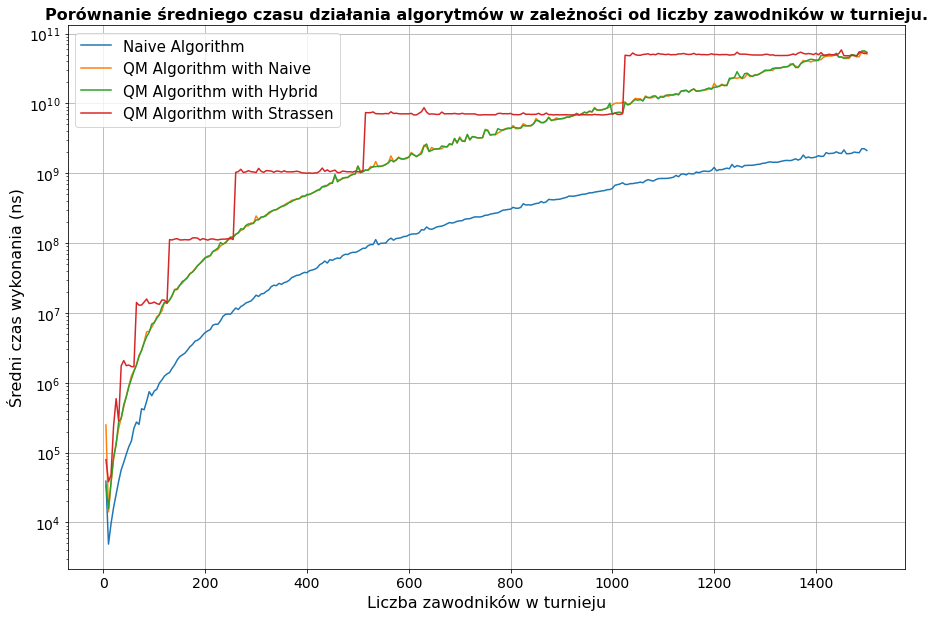

In [5]:
create_plot_for_average_time_comparision("..\\test-results\\algorithm-average-time-results.txt")

## Naive time comparision

In [6]:
def create_plot_for_naive_matrix_comparison(file_name):
    if not os.path.isfile(file_name):
        print(f"File '{file_name}' does not exist.")
        return

    plot_data = {}

    with open(file_name, 'r') as file:
        current_matrix = None
        for line in file:
            line = line.strip()
            if "Matrix" in line:
                current_matrix = line
                plot_data[current_matrix] = []
            else:
                data = [float(value) for value in line.split()]
                if len(data) == 2:
                    plot_data[current_matrix].append(data)

    plt.figure(figsize=(15, 10))
    for name, data in plot_data.items():
        data = np.array(data)
        plt.plot(data[:, 0], data[:, 1], label=name)

    plt.xlabel("Liczba zawodników w turnieju", fontsize=16)
    plt.ylabel("Czas wykonania (ns)", fontsize=16)
    plt.legend(fontsize=15)
    plt.title('Porównanie czasu działania naiwnego algorytmu w zależności od typu macierzy.', fontsize=16, fontweight='bold')
    plt.grid(True)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.yscale("log")

    plt.savefig(".\\images\\naive_matrix_comparison_plot.png", dpi=300)
    plt.show()

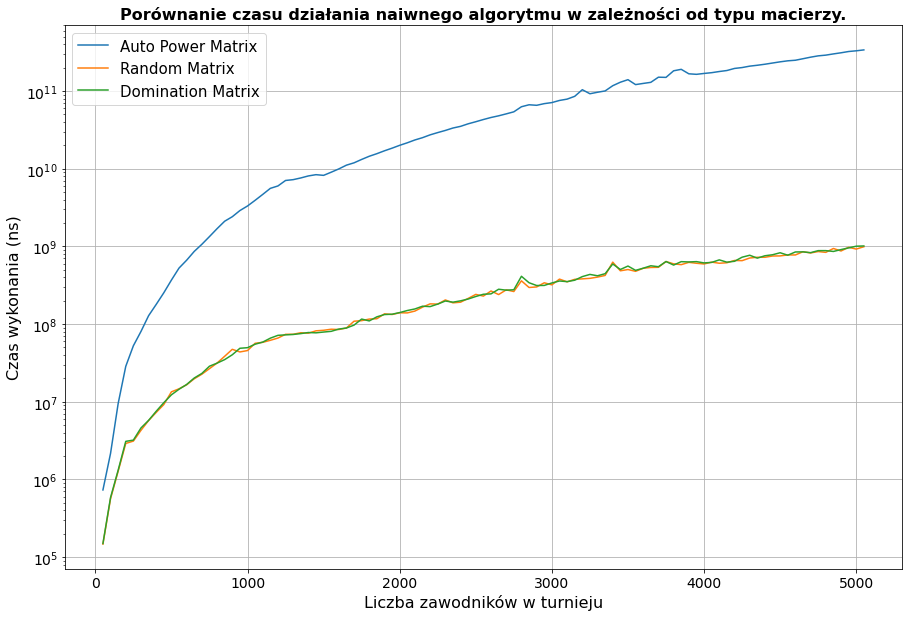

In [7]:
create_plot_for_naive_matrix_comparison("..\\test-results\\naive-time-comparision-results.txt")

## Time comparision for auto-power matrix and domination matrix

In [8]:
def create_plot_for_time_comparision(file_name, matrix_name):
    if not os.path.isfile(file_name):
        print(f"File '{file_name}' does not exist.")
        return

    plot_data = {}

    with open(file_name, 'r') as file:
        current_algorithm = None
        for line in file:
            line = line.strip()
            if "Algorithm" in line:
                current_algorithm = line
                plot_data[current_algorithm] = []
            else:
                data = [float(value) for value in line.split()]
                if len(data) == 2:
                    plot_data[current_algorithm].append(data)

    plt.figure(figsize=(15, 10))
    for name, data in plot_data.items():
        data = np.array(data)
        plt.plot(data[:, 0], data[:, 1], label=name)

    plt.xlabel("Liczba zawodników w turnieju", fontsize=16)
    plt.ylabel("Czas wykonania (ns)", fontsize=16)
    plt.legend(fontsize=15)
    plt.title(f'Porównanie czasu działania algorytmów dla macierzy {matrix_name} w zależności od liczby zawodników w turnieju.', fontsize=16, fontweight='bold')
    plt.grid(True)
    
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.yscale("log")

    plt.savefig(f".\\images\\algorithm-time-comparison-{matrix_name}-matrix-plot.png", dpi=300)
    plt.show()


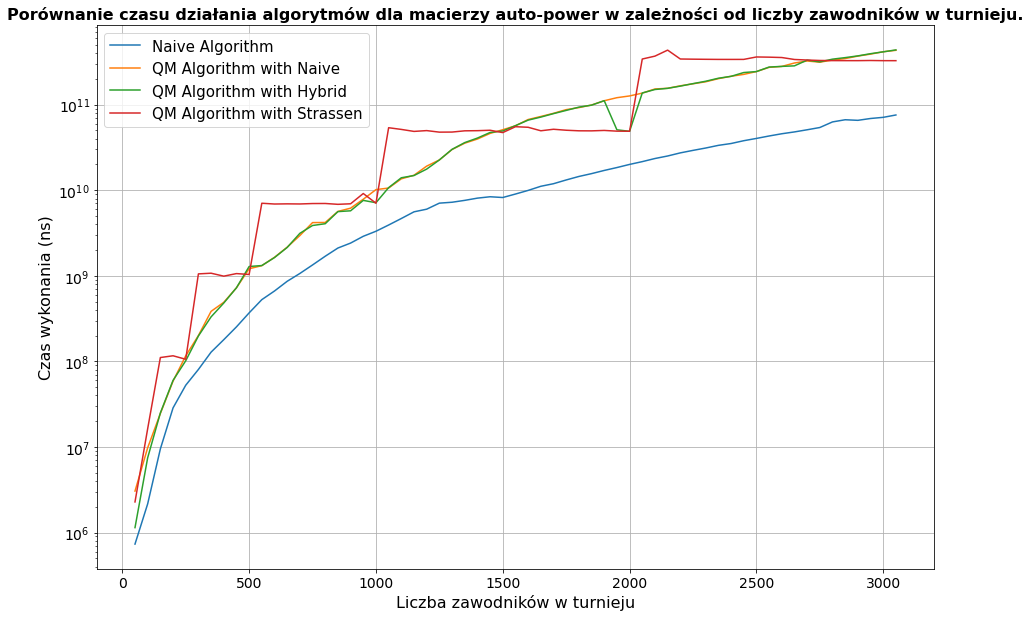

In [11]:
create_plot_for_time_comparision("..\\test-results\\algorithm-time-comparision-auto-power-matrix-results.txt", "auto-power")

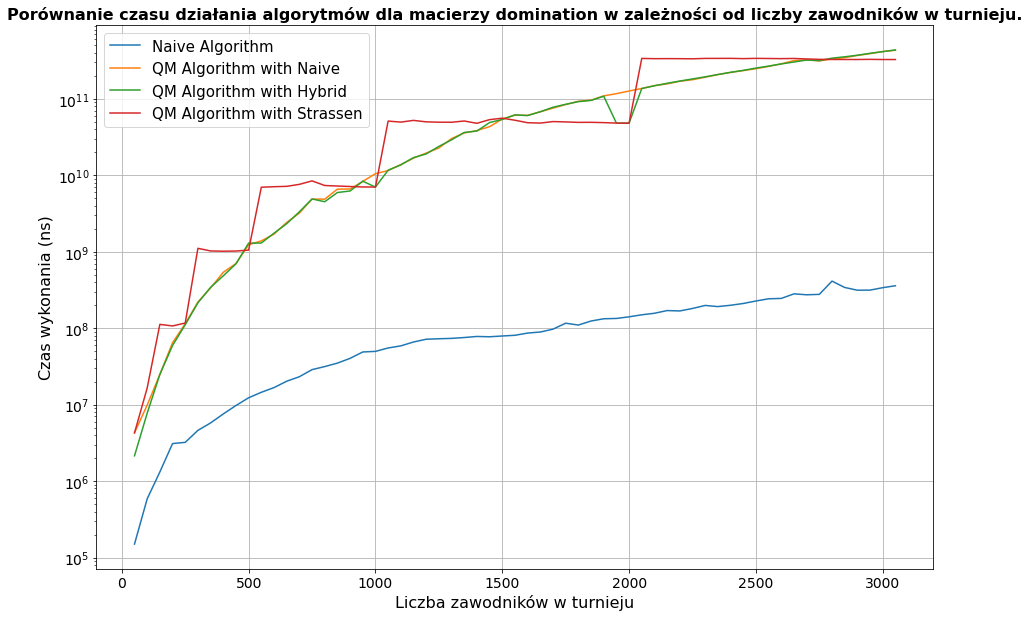

In [12]:
create_plot_for_time_comparision("..\\test-results\\algorithm-time-comparision-domination-matrix-results.txt", "domination")

## Examination of chart breakpoints 

In [84]:
def load_data_from_file(file_name):
    with open(DATA_PATH + file_name, 'r') as f:
        lines = f.readlines()
        k = int(lines[0].strip())
        cut_point = int(lines[2].strip())

        split_point = lines.index('QM Algorithm with Strassen\n')
        data_naive = [line.split() for line in lines[4:split_point] if line.split()]
        data_strassen = [line.split() for line in lines[split_point+1:] if line.split()]

        df_naive = pd.DataFrame(data_naive, columns=['n', 'time'])
        df_naive['n'] = df_naive['n'].astype(int)
        df_naive['time'] = df_naive['time'].astype(np.int64)

        df_strassen = pd.DataFrame(data_strassen, columns=['n', 'time'])
        df_strassen['n'] = df_strassen['n'].astype(int)
        df_strassen['time'] = df_strassen['time'].astype(np.int64)

    return k, cut_point, df_naive, df_strassen

def plot_data(ax, k, cut_point, df_naive, df_strassen, is_bottom_row, is_left_col):
    ax.plot(df_naive['n'], df_naive['time'], label='QM Algorithm with Naive')
    ax.plot(df_strassen['n'], df_strassen['time'], label='QM Algorithm with Strassen')
    ax.axvline(x=cut_point, color='r', linestyle='--', label='Teoretyczny punkt przeciecia r(k)')

    ax.annotate(f'Teoretyczny punkt ({cut_point})', (cut_point, 0), textcoords="offset points", xytext=(0,10), ha='center')
    ax.set_title(f'Analiza punktu przeciecia dla k={k}', fontweight='bold', fontsize=14)
    ax.legend()

    if is_bottom_row:  # Dolne wykresy
        ax.set_xlabel("Liczba zawodników w turnieju", fontsize=14, fontweight='bold')
    if is_left_col:  # Lewe wykresy
        ax.set_ylabel("Czas wykonania (ns)", fontsize=14, fontweight='bold')
    ax.legend(fontsize=13)
    ax.grid(True)
    
    intersection_point = find_intersection_point(df_naive, df_strassen)
    ax.plot(*intersection_point, 'ro')
    ax.annotate(f'({intersection_point[0]})', 
                (intersection_point[0], intersection_point[1]),
                textcoords="offset points", 
                xytext=(35,-30), 
                ha='center', 
                fontsize=12,
                color='red')
    
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_yscale("log")
    
def find_intersection_point(df1, df2):
    merged = pd.merge(df1, df2, on='n', how='inner', suffixes=('_naive', '_strassen'))

    merged['difference'] = np.abs(merged['time_naive'] - merged['time_strassen'])
    intersection_row = merged.loc[merged['difference'].idxmin()]

    return intersection_row['n'], intersection_row['time_naive']


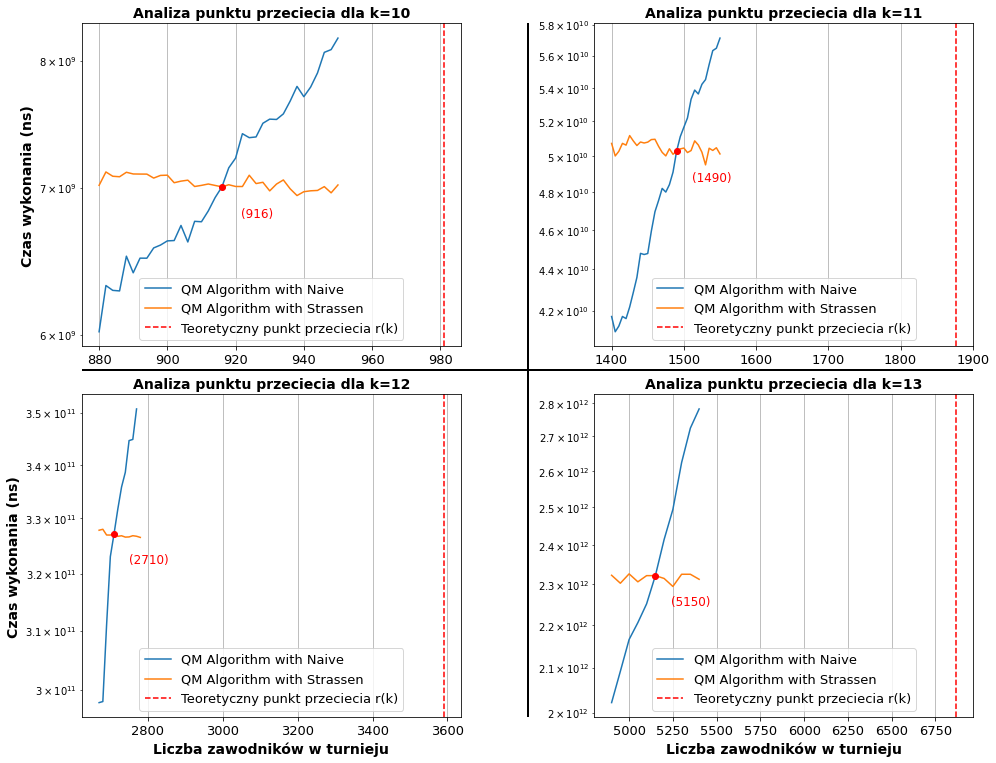

In [85]:
fig, axs = plt.subplots(2, 2, figsize=(15, 11))

for i, file in enumerate(file_list):
    k, cut_point, df_naive, df_strassen = load_data_from_file(file)
    ax = axs[i//2, i%2]
    is_bottom_row = i // 2 == 1
    is_left_col = i % 2 == 0
    plot_data(ax, k, cut_point, df_naive, df_strassen, is_bottom_row, is_left_col)

# Zwiększanie marginesów między wykresami
plt.subplots_adjust(wspace=2)

fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.axhline(0.5, color='black', linewidth=2) 
plt.axvline(0.5, color='black', linewidth=2) 

plt.tight_layout()
plt.savefig(IMAGES_PATH, dpi=300)
plt.show()


## Analysis of asymptotics


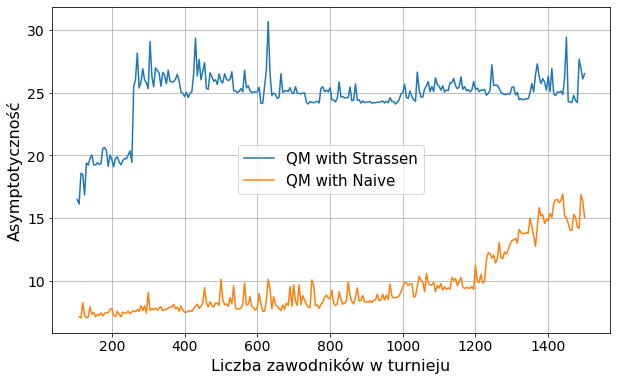

In [98]:
def generate_plot(file_path):
    with open(file_path, 'r') as f:
        data = f.read()

    strassen_data, naive_data = data.split("QM Algorithm with Naive")
    strassen_data = strassen_data.strip().split("\n")[1:]
    strassen_data = [(int(line.split()[0]), float(line.split()[1])) for line in strassen_data]

    naive_data = naive_data.strip().split("\n")[1:]
    naive_data = [(int(line.split()[0]), float(line.split()[1])) for line in naive_data]

    log7 = np.log2(7)
    strassen_factors = [i[1] / (2**(np.ceil(np.log2(i[0])) * log7)) for i in strassen_data]
    naive_factors = [i[1] / (i[0]**3) for i in naive_data]

    plt.figure(figsize=(10, 6))
    plt.plot([i[0] for i in strassen_data], strassen_factors, label="QM with Strassen")
    plt.plot([i[0] for i in naive_data], naive_factors, label="QM with Naive")
    plt.legend(fontsize=15)
    #plt.title("Porównanie asymptotycznosci algorytmu QM oparego o algorytm Naiwny i algorytm Strassena", fontsize=16, fontweight='bold')
    plt.xlabel("Liczba zawodników w turnieju", fontsize=16)
    plt.ylabel("Asymptotyczność", fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.grid(True)
    plt.savefig(f".\\images\\asymptotics-analysis-strassen-naive.png", dpi=300)
    plt.show()

generate_plot("..\\test-results\\naive-strassen-average-time-results.txt")